# Team Justice League

# Proof Of Concept Image Classification Model

### We use the Delaware Pain Database, a collection of staged pictures portraying persons in pain and those with neutral facial expressions. This database is the most comprehensive collection of pain images accessible to academics.

### The data  were retrieved using the tool OpenFace, which use machine learning models to determine the strength of facial muscle movements. OpenFace is the first toolkit containing both running and training source code for facial landmark identification, head posture estimation, facial action unit recognition, and eye-gaze estimation. OpenFace's fundamental computer vision algorithms achieve state-of-the-art performance in all of the aforementioned tasks. Moreover, our programme is capable of real-time performance and can operate from a standard camera without the need for specialised hardware.

## Importing all the required the libraries

In [1]:
import pandas as pd
import glob
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,matthews_corrcoef,cohen_kappa_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Face muscle contractions are  known as "action units." Each action unit retrieved from OpenFace is a continuous variable on a 0–5 scale, expressing the expression's strength. In an Excel spreadsheet, action unit intensities were aligned with the pain or neutral label from the Delaware Pain Database. These data were utilised for model training.

In [2]:
# setting the path for joining multiple nuetralfiles


files=os.path.join("E://Delaware//neutral1","DPD_1_*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)


Resultant CSV after joining all CSV files at a particular location...
     face   confidence   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r  \
0       0        0.975     1.27     1.11     0.09     0.21      0.0     0.00   
1       0        0.975     0.00     0.34     0.00     0.45      0.0     0.88   
2       0        0.975     1.71     1.51     1.21     0.00      0.0     0.73   
3       0        0.975     0.70     1.14     0.37     0.23      0.0     1.65   
4       0        0.975     0.00     0.00     0.37     0.21      0.0     0.00   
..    ...          ...      ...      ...      ...      ...      ...      ...   
257     0        0.975     0.43     0.50     0.47     0.08      0.0     0.00   
258     0        0.975     1.13     0.18     0.85     0.00      0.0     0.73   
259     0        0.975     0.00     0.00     0.00     0.10      0.0     0.00   
260     0        0.975     0.67     0.11     0.00     0.60      0.0     0.00   
261     0        0.975     0.52     0.52     0.00 

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.975,1.27,1.11,0.09,0.21,0.0,0.00,0.0,0.49,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.975,0.00,0.34,0.00,0.45,0.0,0.88,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.975,1.71,1.51,1.21,0.00,0.0,0.73,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.975,0.70,1.14,0.37,0.23,0.0,1.65,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.975,0.00,0.00,0.37,0.21,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0.975,0.43,0.50,0.47,0.08,0.0,0.00,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
258,0,0.975,1.13,0.18,0.85,0.00,0.0,0.73,0.0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
259,0,0.975,0.00,0.00,0.00,0.10,0.0,0.00,0.0,0.00,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
260,0,0.975,0.67,0.11,0.00,0.60,0.0,0.00,0.0,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_neutral=df.iloc[:, 2:38]

In [6]:
df_neutral

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1.27,1.11,0.09,0.21,0.0,0.00,0.0,0.49,0.22,1.57,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.34,0.00,0.45,0.0,0.88,0.0,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.71,1.51,1.21,0.00,0.0,0.73,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.70,1.14,0.37,0.23,0.0,1.65,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.37,0.21,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.43,0.50,0.47,0.08,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
258,1.13,0.18,0.85,0.00,0.0,0.73,0.0,0.00,0.00,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
259,0.00,0.00,0.00,0.10,0.0,0.00,0.0,0.00,0.31,1.18,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
260,0.67,0.11,0.00,0.60,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df_neutral.insert(0, 'class', '0')
print(df_neutral)

    class   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r   AU09_r  \
0       0     1.27     1.11     0.09     0.21      0.0     0.00      0.0   
1       0     0.00     0.34     0.00     0.45      0.0     0.88      0.0   
2       0     1.71     1.51     1.21     0.00      0.0     0.73      0.0   
3       0     0.70     1.14     0.37     0.23      0.0     1.65      0.0   
4       0     0.00     0.00     0.37     0.21      0.0     0.00      0.0   
..    ...      ...      ...      ...      ...      ...      ...      ...   
257     0     0.43     0.50     0.47     0.08      0.0     0.00      0.0   
258     0     1.13     0.18     0.85     0.00      0.0     0.73      0.0   
259     0     0.00     0.00     0.00     0.10      0.0     0.00      0.0   
260     0     0.67     0.11     0.00     0.60      0.0     0.00      0.0   
261     0     0.52     0.52     0.00     0.00      0.0     0.00      0.0   

      AU10_r   AU12_r  ...   AU12_c   AU14_c   AU15_c   AU17_c   AU20_c  \
0       0.49

In [8]:
# setting the path for joining pain multiple files

#files=os.path.join("E:\OpenFace_2.2.0_win_x86\OpenFace_2.2.0_win_x86\processed","DPD_1_A****.csv")
files1=os.path.join("E://Delaware//pain","DPD_1_*.csv")


# list of merged files returned
files1 = glob.glob(files1)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df1 = pd.concat(map(pd.read_csv, files1), ignore_index=True)
print(df1)


Resultant CSV after joining all CSV files at a particular location...
     face   confidence   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r  \
0       0        0.975     1.54     1.12     0.00     0.67     0.00     1.20   
1       0        0.975     0.69     1.35     0.00     0.74     0.00     0.55   
2       0        0.975     1.30     0.97     0.09     0.00     0.00     0.75   
3       0        0.975     2.19     1.83     1.65     0.00     0.00     0.71   
4       0        0.975     0.07     0.59     0.76     0.00     1.90     1.43   
..    ...          ...      ...      ...      ...      ...      ...      ...   
650     0        0.975     0.37     0.00     1.76     0.00     0.56     1.28   
651     0        0.975     0.62     0.00     0.74     0.00     0.42     0.87   
652     0        0.975     0.83     0.00     1.68     0.00     0.56     1.08   
653     0        0.975     0.36     0.00     1.18     0.00     2.04     1.60   
654     0        0.975     0.00     0.00     0.00 

In [9]:
df1

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.975,1.54,1.12,0.00,0.67,0.00,1.20,0.00,0.44,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0,0.975,0.69,1.35,0.00,0.74,0.00,0.55,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0.975,1.30,0.97,0.09,0.00,0.00,0.75,0.00,0.18,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0,0.975,2.19,1.83,1.65,0.00,0.00,0.71,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,0.975,0.07,0.59,0.76,0.00,1.90,1.43,0.32,1.76,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0,0.975,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,0,0.975,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,0,0.975,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,0,0.975,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [10]:
df_pain=df1.iloc[:, 2:38] 

In [11]:
df_pain

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1.54,1.12,0.00,0.67,0.00,1.20,0.00,0.44,0.00,0.89,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.69,1.35,0.00,0.74,0.00,0.55,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.30,0.97,0.09,0.00,0.00,0.75,0.00,0.18,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,2.19,1.83,1.65,0.00,0.00,0.71,0.00,0.00,0.14,1.22,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.07,0.59,0.76,0.00,1.90,1.43,0.32,1.76,1.42,0.76,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,2.85,2.00,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [12]:
df_pain.insert(0, 'class', '1')
print(df_pain)

    class   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r   AU09_r  \
0       1     1.54     1.12     0.00     0.67     0.00     1.20     0.00   
1       1     0.69     1.35     0.00     0.74     0.00     0.55     0.00   
2       1     1.30     0.97     0.09     0.00     0.00     0.75     0.00   
3       1     2.19     1.83     1.65     0.00     0.00     0.71     0.00   
4       1     0.07     0.59     0.76     0.00     1.90     1.43     0.32   
..    ...      ...      ...      ...      ...      ...      ...      ...   
650     1     0.37     0.00     1.76     0.00     0.56     1.28     1.26   
651     1     0.62     0.00     0.74     0.00     0.42     0.87     1.06   
652     1     0.83     0.00     1.68     0.00     0.56     1.08     1.27   
653     1     0.36     0.00     1.18     0.00     2.04     1.60     0.00   
654     1     0.00     0.00     0.00     0.10     0.84     0.54     0.01   

      AU10_r   AU12_r  ...   AU12_c   AU14_c   AU15_c   AU17_c   AU20_c  \
0       0.44

In [13]:
df_pain

,class,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,1.54,1.12,0.00,0.67,0.00,1.20,0.00,0.44,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,1,0.69,1.35,0.00,0.74,0.00,0.55,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,1.30,0.97,0.09,0.00,0.00,0.75,0.00,0.18,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,1,2.19,1.83,1.65,0.00,0.00,0.71,0.00,0.00,0.14,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0.07,0.59,0.76,0.00,1.90,1.43,0.32,1.76,1.42,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,1,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,1,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,1,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,2.85,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [14]:
data = [df_neutral, df_pain]
  
dataset = pd.concat(data)
display(dataset)

,class,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,1.27,1.11,0.09,0.21,0.00,0.00,0.00,0.49,0.22,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.00,0.34,0.00,0.45,0.00,0.88,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.71,1.51,1.21,0.00,0.00,0.73,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.70,1.14,0.37,0.23,0.00,1.65,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.00,0.00,0.37,0.21,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,1,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,1,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,1,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,2.85,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Each row of data in this table represents a single participant, with class denoting pain or neutral and AU xx reflecting the action unit (muscle movement) intensities of various facial muscles.

In [15]:
final= dataset.sample(frac = 1)

In [16]:
final

,class,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
171,1,0.41,1.54,0.00,0.00,2.78,4.28,3.52,3.10,2.63,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
185,1,0.15,0.00,1.64,0.00,2.50,4.08,1.64,2.15,0.99,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
169,0,0.25,1.37,0.00,0.42,0.00,1.48,0.15,0.00,0.33,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
396,1,1.73,2.76,0.00,1.35,0.09,0.67,0.00,0.00,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196,0,0.86,0.90,0.17,0.13,0.21,0.74,0.00,0.00,0.39,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,0.86,0.00,0.74,0.00,1.08,2.48,1.44,0.49,0.72,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
380,1,0.00,0.00,1.60,0.55,2.34,4.99,2.75,1.94,0.24,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
160,1,0.14,0.00,0.00,0.00,3.42,3.34,1.42,2.84,3.56,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
99,1,0.13,1.38,1.66,0.00,0.60,3.02,2.29,1.44,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [17]:
x= final.drop('class', axis = 1) # Features variables
y= final['class'] # Target variable

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(
    x,y, test_size=0.25, random_state=0)

In [19]:
x_train

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
10,0.71,0.00,0.45,0.00,1.59,2.96,0.07,1.28,1.72,1.93,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
482,0.44,0.00,2.44,0.00,1.63,1.98,0.23,1.26,1.67,0.94,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
133,0.98,0.87,0.15,0.61,0.00,0.00,0.00,0.00,0.00,0.08,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
120,0.91,1.40,0.00,0.19,0.01,0.00,0.00,0.00,0.73,1.11,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
197,1.33,0.99,0.79,1.45,0.03,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,1.31,0.00,3.20,0.00,1.22,2.86,0.42,0.76,0.00,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
495,0.00,0.00,0.92,0.00,1.95,2.45,0.96,1.51,1.52,1.26,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
410,1.26,0.00,1.19,0.89,0.02,1.28,0.00,0.00,0.63,0.74,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
127,0.48,1.15,0.01,0.31,0.36,0.69,1.58,0.66,0.03,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
x_test

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
449,0.00,0.00,2.64,0.00,1.92,3.27,3.56,2.16,0.20,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
243,1.59,2.21,0.01,1.60,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
519,0.30,0.00,1.13,0.78,0.81,1.20,1.71,1.56,0.00,1.05,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
470,1.32,0.69,1.21,0.00,0.34,2.20,0.00,0.46,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
94,0.50,0.44,0.00,0.82,0.00,0.00,0.00,0.00,0.19,0.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.29,0.00,0.00,0.59,0.12,2.09,0.31,0.75,0.43,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
316,1.04,0.00,2.99,0.00,2.41,3.94,0.79,2.09,2.09,1.82,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
42,0.00,0.01,0.88,0.00,0.55,0.75,0.92,1.51,0.46,2.23,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
140,0.00,0.95,0.00,1.23,0.00,1.04,0.00,0.00,0.07,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y_train

10     1
482    1
133    0
120    0
197    0
      ..
18     1
495    1
410    1
127    1
246    0
Name: class, Length: 687, dtype: object

In [22]:
y_test

449    1
243    0
519    1
470    1
94     0
      ..
440    1
316    1
42     1
140    0
184    0
Name: class, Length: 230, dtype: object

In [23]:
Log_model = LogisticRegression().fit(x_train,y_train)
tree_model = DecisionTreeClassifier().fit(x_train,y_train)
random_model = RandomForestClassifier().fit(x_train,y_train)
extra_model = ExtraTreesClassifier().fit(x_train,y_train)

xgb_model = XGBClassifier().fit(x_train,y_train)
KNN_model = KNeighborsClassifier().fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
def evaluate_classification_model(model,x_test,y_test):
    pred = model.predict(x_test)
    print("Accuarcy Score : ",accuracy_score(y_test,pred))
    print("Auc score : ",roc_auc_score(y_test,pred))
    print("Recall Score : ",recall_score(y_test,pred))
    print("Precision Score : ",precision_score(y_test,pred))
    print("F1 Score : ",f1_score(y_test,pred))
    print("Kappa Score : ",cohen_kappa_score(y_test,pred))
    print("MCC Score : ",matthews_corrcoef(y_test,pred))

# Pycaret

### PyCaret is an open-source Python machine learning library that employs less codes and reduces hypotheses to insights in a Machine Learning experiment's time cycle. PyCaret allows complicated machine learning tasks with few lines of code. PyCaret also includes scikit-learn, XGBoost, Microsoft LightGBM, and spaCy.

In [25]:
from pycaret.classification import *

## Preprocessing of Data

### Setup() starts machine learning experiments and sets up training pipelines. The function's experiment can have many other parameters set. The setup() method must be called before running any other function, using "data" and "target" as necessary inputs.

In [26]:
clf=setup(data=final,target='class')

,Description,Value
0,session_id,5049
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(917, 36)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
# checking different models available

models()


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# Comparing Models
### Using cross validation strategy to compare different models

In [28]:
best_model = compare_models(fold =3, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9267,0.9779,0.9479,0.9503,0.9489,0.8190,0.8200,0.2533
lr,Logistic Regression,0.9407,0.9776,0.9500,0.9668,0.9583,0.8556,0.8560,2.4867
xgboost,Extreme Gradient Boosting,0.9282,0.9758,0.9413,0.9586,0.9497,0.8243,0.8257,0.2633
lightgbm,Light Gradient Boosting Machine,0.9298,0.9749,0.9413,0.9602,0.9506,0.8291,0.8299,1.0133
et,Extra Trees Classifier,0.9329,0.9747,0.9500,0.9563,0.9531,0.8352,0.8355,0.2267
gbc,Gradient Boosting Classifier,0.9204,0.9731,0.9414,0.9474,0.9442,0.8055,0.8065,0.1767
lda,Linear Discriminant Analysis,0.9298,0.9703,0.9392,0.9623,0.9505,0.8297,0.8307,0.0633
knn,K Neighbors Classifier,0.9329,0.9678,0.9196,0.9860,0.9516,0.8425,0.8480,2.4067
nb,Naive Bayes,0.9220,0.9635,0.9261,0.9641,0.9446,0.8127,0.8148,0.0167
ada,Ada Boost Classifier,0.9267,0.9599,0.9457,0.9518,0.9487,0.8200,0.8202,0.1200


### Creating a specific ML model- Light Gradient Boosting Machine

In [29]:
model = create_model('lightgbm', fold = 3)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9159,0.9716,0.9221,0.9595,0.9404,0.7977,0.7996
1,0.9579,0.9923,0.9608,0.9800,0.9703,0.8983,0.8988
2,0.9155,0.9609,0.9412,0.9412,0.9412,0.7912,0.7912
Mean,0.9298,0.9749,0.9413,0.9602,0.9506,0.8291,0.8299
Std,0.0199,0.0130,0.0158,0.0159,0.0139,0.0490,0.0489


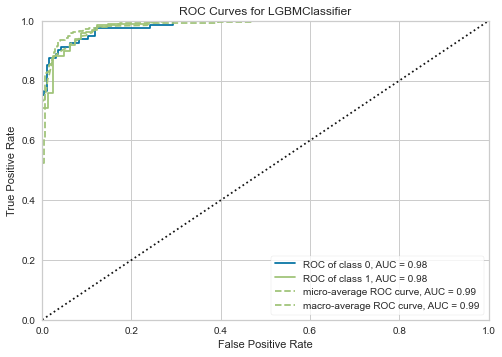

In [30]:
# Plotting auc curve
plot_model(model, plot = 'auc')

### Plotting precision recall curve


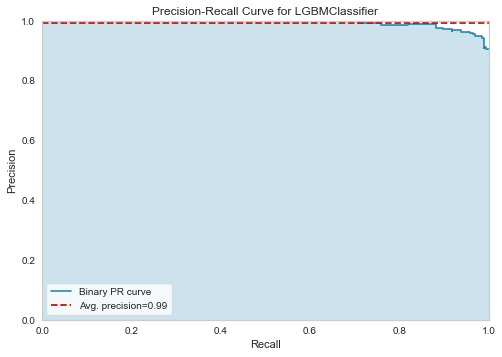

In [31]:
plot_model(model, plot='pr')

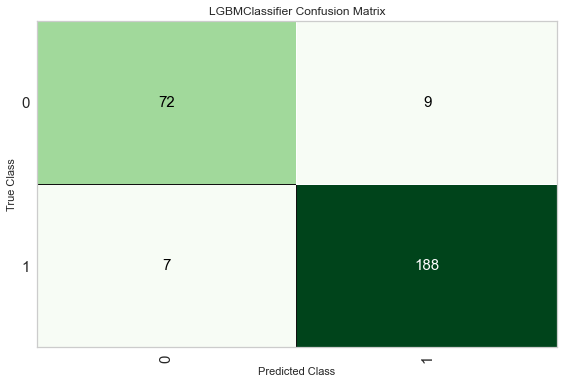

In [32]:
# Plotting confusion matrix
plot_model(model, plot='confusion_matrix')

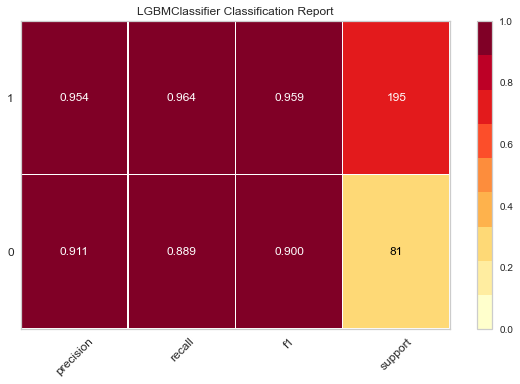

In [33]:
# Plotting classification report
plot_model(model, plot='class_report')

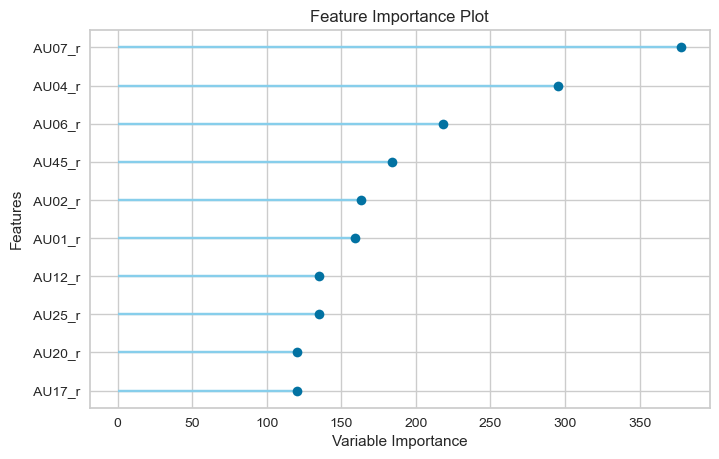

In [34]:
# Plotting feature importance
plot_model(model, plot='feature')

In [35]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

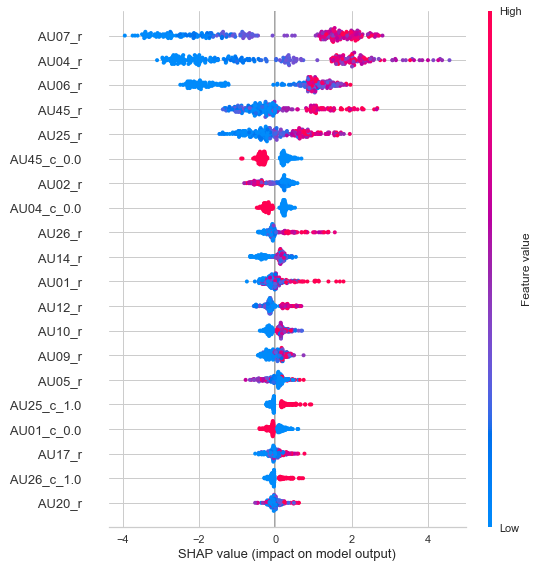

In [36]:
interpret_model(model)

In [37]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9420,0.9848,0.9641,0.9543,0.9592,0.8592,0.8593


,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU17_c_1.0,AU20_c_1.0,AU23_c_0.0,AU25_c_1.0,AU26_c_1.0,AU28_c_1.0,AU45_c_0.0,class,Label,Score
0,0.00,0.00,0.19,2.13,1.84,1.83,1.65,0.25,1.16,0.00,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0.9998
1,0.00,0.48,1.37,0.00,1.87,4.25,2.76,0.37,0.00,0.53,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0000
2,0.48,0.32,0.00,0.71,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9976
3,0.00,0.14,2.18,0.52,3.15,4.07,3.70,1.93,1.16,2.05,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.0000
4,1.19,0.00,0.27,0.00,3.19,4.43,1.93,2.15,2.65,2.29,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2.67,0.00,0.24,1.52,0.26,2.06,0.13,1.96,1.53,1.67,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9995
272,1.39,2.36,0.00,0.00,0.00,1.69,0.00,0.00,0.55,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9949
273,0.71,0.65,0.39,0.00,0.51,2.27,0.20,0.41,0.64,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9999
274,0.00,0.00,1.33,0.00,3.68,2.97,0.96,2.57,2.44,2.26,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.9999


In [38]:
# We already have one model lightgbm (model), lets create two more models
xgboost = create_model('xgboost', fold =3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9252,0.9715,0.9221,0.9726,0.9467,0.8220,0.8252
1,0.9579,0.9892,0.9608,0.9800,0.9703,0.8983,0.8988
2,0.9014,0.9666,0.9412,0.9231,0.9320,0.7526,0.7531
Mean,0.9282,0.9758,0.9413,0.9586,0.9497,0.8243,0.8257
Std,0.0232,0.0097,0.0158,0.0253,0.0158,0.0595,0.0595


In [39]:
# Using blend function in pycaret
# model for lightgbm model
blended_model1 = blend_models(estimator_list = [model,xgboost], method = 'soft', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9112,0.9720,0.9091,0.9655,0.9365,0.7896,0.7936
1,0.9626,0.9916,0.9608,0.9866,0.9735,0.9101,0.9110
2,0.9061,0.9670,0.9412,0.9290,0.9351,0.7656,0.7658
Mean,0.9266,0.9769,0.9370,0.9604,0.9483,0.8218,0.8234
Std,0.0255,0.0106,0.0213,0.0238,0.0178,0.0632,0.0629


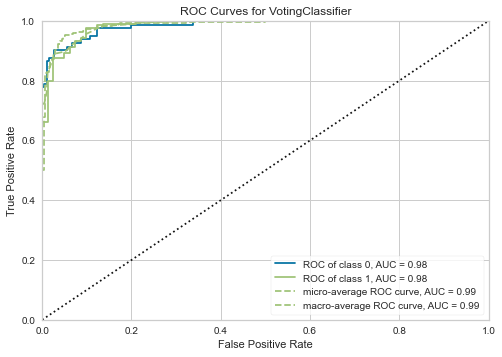

In [40]:
# Check plots for blended model
# Plotting auc curve
plot_model(blended_model1, plot = 'auc')

In [41]:
predict_model(blended_model1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9493,0.9847,0.9692,0.9594,0.9643,0.8768,0.8769


,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU17_c_1.0,AU20_c_1.0,AU23_c_0.0,AU25_c_1.0,AU26_c_1.0,AU28_c_1.0,AU45_c_0.0,class,Label,Score
0,0.00,0.00,0.19,2.13,1.84,1.83,1.65,0.25,1.16,0.00,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0.9994
1,0.00,0.48,1.37,0.00,1.87,4.25,2.76,0.37,0.00,0.53,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0000
2,0.48,0.32,0.00,0.71,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9976
3,0.00,0.14,2.18,0.52,3.15,4.07,3.70,1.93,1.16,2.05,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9999
4,1.19,0.00,0.27,0.00,3.19,4.43,1.93,2.15,2.65,2.29,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2.67,0.00,0.24,1.52,0.26,2.06,0.13,1.96,1.53,1.67,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9987
272,1.39,2.36,0.00,0.00,0.00,1.69,0.00,0.00,0.55,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9961
273,0.71,0.65,0.39,0.00,0.51,2.27,0.20,0.41,0.64,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9995
274,0.00,0.00,1.33,0.00,3.68,2.97,0.96,2.57,2.44,2.26,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.9999
